In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Task-D: Collinear features and their effect on linear models

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/gdrive/My Drive/Datasets/task_d.csv')

In [4]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [5]:
data.shape

(100, 8)

In [6]:
data['target'].value_counts()

1    50
0    50
Name: target, dtype: int64

In [7]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

#Correlation matrix

Text(0.5, 1.0, 'Corrrelation Heatmap')

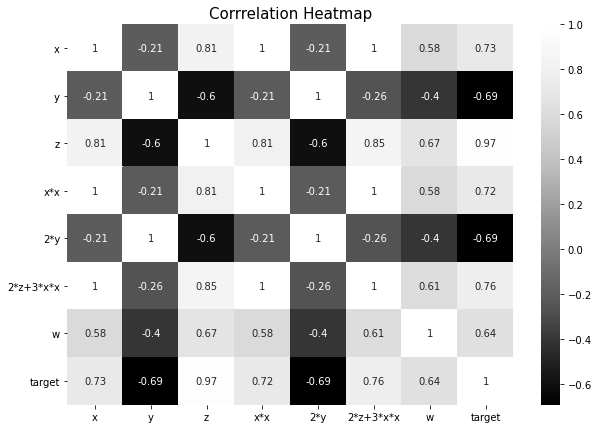

In [57]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap = 'Greys_r')
plt.title('Corrrelation Heatmap',fontsize=15)

#Logistic Regression

In [58]:
model = SGDClassifier(loss='log',random_state=10,n_jobs=-1)



In [59]:
# model.fit(X[:80],Y[:80])
# y_pred = model.predict(X[80:])
# print(accuracy_score(Y[80:],y_pred))
# print(model.coef_)

In [60]:
model.fit(X,Y)
y_pred = model.predict(X)
print(accuracy_score(Y,y_pred))
print(model.coef_)

1.0
[[ 1.97774216 -3.22811392  5.07335395  1.86337879 -3.22811392  2.28957519
   0.69634037]]


In [61]:
model = SGDClassifier(loss='log',random_state=10,n_jobs=-1)
params = {'alpha' : np.logspace(-3,3,7)}
clf = GridSearchCV(model,param_grid=params,cv =5,n_jobs=-1,)

In [62]:
# clf.fit(X[:80],Y[:80])

In [63]:
clf.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5, random_state=10,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
# print(clf.best_params_,clf.best_score_)

In [65]:
print(clf.best_params_,clf.best_score_)

{'alpha': 0.001} 1.0


In [66]:
# best_model = SGDClassifier(loss='log',alpha=clf.best_params_['alpha'],random_state=10)
# best_model.fit(X[:80],Y[:80])
# y_best_pred = best_model.predict(X[80:])
# best_accuracy = (accuracy_score(Y[80:],y_best_pred))
# w = best_model.coef_
# print(best_accuracy)
# print(best_model.coef_)

In [67]:
best_model = SGDClassifier(loss='log',alpha=clf.best_params_['alpha'],random_state=10)
best_model.fit(X,Y)
y_best_pred = best_model.predict(X)
best_accuracy = (accuracy_score(Y,y_best_pred))
w = best_model.coef_
print(best_accuracy)
print(best_model.coef_)

1.0
[[ 1.52202228 -1.62738769  3.57438693  1.27365081 -1.62738769  1.57784101
   0.52019066]]


#Pertubation test

In [68]:
X_new = data.drop('target',axis = 1).applymap(lambda x : x + 0.01)


In [69]:
X_new.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w
0,-0.571066,0.851837,-1.002978,-0.594025,0.851837,-0.655927,-0.526277
1,-0.884309,-0.197835,-1.002978,-0.873052,-0.197835,-0.907054,-0.512364
2,-1.197552,0.222034,-1.072312,-1.140918,0.222034,-1.156507,0.215738
3,-1.354174,0.012099,-0.933643,-1.270666,0.012099,-1.256540,-0.655720
4,-0.727687,1.061772,-1.002978,-0.734934,1.061772,-0.782746,-0.725054


In [70]:
# # best_model1 = SGDClassifier(loss='log',alpha=clf.best_params_['alpha'],random_state=10)
# best_model.fit(X_new[:80],Y[:80])
# y_pred_edited = best_model.predict(X_new[80:])
# accuracy_edited = accuracy_score(Y[80:],y_pred_edited)
# w1 = best_model.coef_
# print(accuracy_edited)
# print(best_model.coef_)

In [71]:
# best_model1 = SGDClassifier(loss='log',alpha=clf.best_params_['alpha'],random_state=10)
best_model.fit(X_new,Y)
y_pred_edited = best_model.predict(X_new)
accuracy_edited = accuracy_score(Y,y_pred_edited)
w1 = best_model.coef_
print(accuracy_edited)
print(best_model.coef_)

1.0
[[ 1.5161968  -1.61449879  3.55859495  1.27018523 -1.61449879  1.57271702
   0.51151258]]


In [72]:
best_accuracy - accuracy_edited

0.0

In [73]:
v1 = (np.absolute(w-w1) / abs(w) ) * 100

In [74]:
print(v1)

[[0.38274609 0.79199993 0.44180947 0.27209789 0.79199993 0.32474671
  1.66825073]]


##Top 5 columns with most difference in coefficients

In [75]:
index = np.argsort(v1[0])[::-1][:5]

In [76]:
data.columns[index]

Index(['w', '2*y', 'y', 'z', 'x'], dtype='object')

#SVM

In [77]:
# model_svm = SGDClassifier(random_state=10)
# model_svm.fit(X[:80],Y[:80])
# y_pred_s = model_svm.predict(X[80:])
# print(accuracy_score(Y[80:],y_pred_s))
# print(model_svm.coef_)

In [78]:
model_svm = SGDClassifier(random_state=10)
model_svm.fit(X,Y)
y_pred_s = model_svm.predict(X)
print(accuracy_score(Y,y_pred_s))
print(model_svm.coef_)

1.0
[[  9.87296448 -14.83998075  14.53209542   8.90087716 -14.83998075
    9.76536324   5.95465511]]


In [79]:
params = {'alpha' : np.logspace(-3,3,7)}
clf = GridSearchCV(model_svm,param_grid=params,cv =5,n_jobs=-1)

In [80]:
# clf.fit(X[:80],Y[:80])

In [81]:
clf.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=10,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
# print(clf.best_params_,clf.best_score_)

In [83]:
print(clf.best_params_,clf.best_score_)

{'alpha': 0.001} 1.0


In [84]:
# best_model_svm = SGDClassifier(alpha=clf.best_params_['alpha'],random_state=10)
# best_model_svm.fit(X[:80],Y[:80])
# y_best_pred_s = best_model_svm.predict(X[80:])
# best_accuracy_s = (accuracy_score(Y[80:],y_best_pred_s))
# w = best_model_svm.coef_
# print(best_accuracy_s)
# print(best_model_svm.coef_)

In [85]:
best_model_svm = SGDClassifier(alpha=clf.best_params_['alpha'],random_state=10)
best_model_svm.fit(X,Y)
y_best_pred_s = best_model_svm.predict(X)
best_accuracy_s = (accuracy_score(Y,y_best_pred_s))
w = best_model_svm.coef_
print(best_accuracy_s)
print(best_model_svm.coef_)

1.0
[[ 2.07843954 -1.94761397  4.78980562  1.81001665 -1.94761397  2.20731536
   1.13957609]]


In [86]:
# # best_model_s = SGDClassifier(alpha=clf.best_params_['alpha'],random_state=10)
# best_model_svm.fit(X_new[:80],Y[:80])
# y_best_pred_s = best_model_svm.predict(X_new[80:])
# best_accuracy_s1 = (accuracy_score(Y[80:],y_best_pred_s))
# w1 = best_model_svm.coef_
# print(best_accuracy_s1)
# print(best_model_svm.coef_)

##Fitting on new data

In [87]:
best_model_svm.fit(X_new,Y)
y_best_pred_s = best_model_svm.predict(X_new)
best_accuracy_s1 = (accuracy_score(Y,y_best_pred_s))
w1 = best_model_svm.coef_
print(best_accuracy_s1)
print(best_model_svm.coef_)

1.0
[[ 2.08772607 -1.93832744  4.79909215  1.81930319 -1.93832744  2.2166019
   1.14886262]]


In [88]:
best_accuracy_s - best_accuracy_s1

0.0

In [89]:
# np.absolute(w-w1)

In [90]:
v1 = (np.absolute(w-w1) / abs(w) ) * 100

###Top 5 columns with most difference in coefficients

In [91]:
index = np.argsort(v1[0])[::-1][:5]

In [92]:
data.columns[index]

Index(['w', 'x*x', '2*y', 'y', 'x'], dtype='object')

#Observation

* We've trained the best model for both LR and SVM on original data and the synthetic data (with noise) and checked the accuracy and the difference in weights.
* It can be seen that there is no significant difference in accuracy or the magnitude of the weights.
* The top 5 features with the most change in the weights has also been listed in order.
